# Supervised Learning: Regression & Classification

In this week's workshop, we will learn about `supervised machine learning` wherein an annotated data having input-output pair is given to us to train machine learning model. The trained model then can be used to make predictions on `unsee` data (or test set).

### Dataset Description

You are given `houses_portland.csv` file which contains columns for `area of a house`, `number of bedrooms in a house`, and `price`. The goal is to build model which can predict `price of a house` given `number of bedrooms` and `area`. First we will load dataset and find relationship between variables.

In [1]:
# Import the commonly-used modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
data = pd.read_csv("houses_portland.csv")
print("data size: "+str(data.shape))
data.head()

data size: (47, 3)


,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Task 1: Ordinary linear regression model on one-dimensional feature/variable

### Let's show a demo first

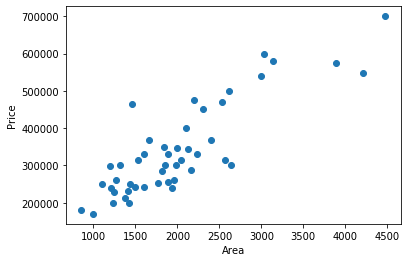

In [3]:
# Visually explore the relationship between "area" and "price"
X = data['area'].values
y = data['price'].values
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Split data into `train` and `test` using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from sklearn library.

In [4]:
# Split data
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2)
X_train = np.reshape(X_train, (-1, 1))  # change from 1D array to 2D array
X_test = np.reshape(X_test, (-1, 1))
print("training data feature shape:", X_train.shape)
print("training data label shape:", y_train.shape)
print("test data feature space shape:", X_test.shape)
print("test data label shape:", y_test.shape)

training data feature shape: (37, 1)
training data label shape: (37,)
test data feature space shape: (10, 1)
test data label shape: (10,)


Looking at the shape of train and test sets, we can say that out of total 47 samples, 37 samples are in training and the remaining 10 samples are in test. Look at the documentation of `train_test_split` function to find out whether data is shuffled or not during the split operation.

### Model Development (or model training)

In [5]:
# Build linear regression model
from sklearn import linear_model as lm
ordinaryLRmodel = lm.LinearRegression()
ordinaryLRmodel.fit(X_train, y_train)

LinearRegression()

In [6]:
# Print the coefficients
print("coefficient:", ordinaryLRmodel.coef_)
print("intercept:", ordinaryLRmodel.intercept_)

coefficient: [127.90158793]
intercept: 88267.70139168025


What is an Intercept? How you define coefficient?

### Plotting regression line

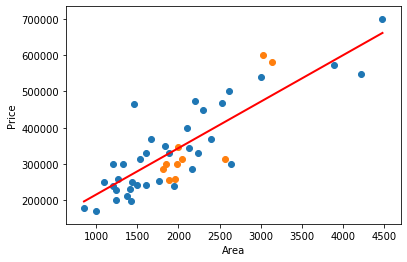

In [7]:
# Plot the model
x_line=[X.min(), X.max()]
y_line=[ordinaryLRmodel.intercept_+ordinaryLRmodel.coef_*X.min(), ordinaryLRmodel.intercept_+ordinaryLRmodel.coef_*X.max()]
plt.plot(x_line, y_line, 'r', lw=2)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Model Evaluation (on test set)

In [8]:
# Prediction/Testing
y_pred = ordinaryLRmodel.predict(X_test)
y_pred

array([344070.87725834, 416591.07761654, 342152.35343934, 319897.47713894,
       489494.98273854, 329745.89940981, 325141.44224421, 339210.61691687,
       475937.4144176 , 349186.94077567])

Refer to https://en.wikipedia.org/wiki/Coefficient_of_determination for more details about coefficient of determination $r^2$

In [9]:
# Performance metrics
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' %r2_score(y_test, y_pred))

Mean squared error: 5048191405.44
Coefficient of determination: 0.65


## Task 2: Ordinary linear regression model on multi-dimensional features/variables

In [10]:
# Data preparatoin
X = data[['area', 'bedroom']].values
y = data['price'].values

### Split data into training and testing sets

In [11]:
# Write your code here


### Build linear regression model

In [12]:
# Write your code here


### Check model coefficients and comment

In [13]:
# Write your code here


### Do model predictions on test set

In [14]:
# Write your code here


### Get model scores in terms of MSE and r^2 scores

In [15]:
# Write your code here


## Task 3: Nearest neighbors based classification

### Data preprocessing

In [10]:
# Import the commonly-used modules
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("titanic.csv")
print("data size: "+str(data.shape))
data.head()

data size: (891, 12)


,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0


In [11]:
# size of the data
print("(row, column):",data.shape)

(row, column): (891, 12)


In [12]:
# check for missing values
data.isnull().sum()

PassengerId      0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass           0
Survived         0
dtype: int64

In [13]:
# one option is to just simply drop rows with any missing values
data_no_missing_value=data.dropna()
print("(row, column) after dropping missing values:\n",data_no_missing_value.shape)

(row, column) after dropping missing values:
 (183, 12)


In [14]:
# get one column from the data
data_name=data_no_missing_value["Name"]
data_name

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
6                                McCarthy, Mr. Timothy J
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
                             ...                        
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
872                             Carlsson, Mr. Frans Olof
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
Name: Name, Length: 183, dtype: object

In [15]:
# get three columns from the data
data_sex_age_survived=data_no_missing_value[['Sex', 'Age', 'Survived']]
data_sex_age_survived

,Sex,Age,Survived
1,female,38.0,1
3,female,35.0,1
6,male,54.0,0
10,female,4.0,1
11,female,58.0,1
...,...,...,...
871,female,47.0,1
872,male,33.0,0
879,female,56.0,1
887,female,19.0,1


In [16]:
# encode categorical attributes
data_sex_age_survived['Sex']=data_sex_age_survived.Sex.astype('category').cat.codes
data_sex_age_survived

/Users/mq20197379/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sex,Age,Survived
1,0,38.0,1
3,0,35.0,1
6,1,54.0,0
10,0,4.0,1
11,0,58.0,1
...,...,...,...
871,0,47.0,1
872,1,33.0,0
879,0,56.0,1
887,0,19.0,1


### Build model and perform evaluation

In [17]:
# define X and y
feature_columns=['Sex', 'Age']
X=data_sex_age_survived[feature_columns]
y=data_sex_age_survived.Survived
print(X.head())
print(y.head())

    Sex   Age
1     0  38.0
3     0  35.0
6     1  54.0
10    0   4.0
11    0  58.0
1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64


In [18]:
# train/test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
# train a 1-NN classifier
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
# predict the test data
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [21]:
# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.7391304347826086


### Now, let's do the task

In [27]:
# Load the dataset
data = pd.read_csv("titanic.csv")
print("data size: "+str(data.shape))
data.head()

data size: (891, 12)


,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,0


In [28]:
# delete the attribute "Cabin"
del data['Cabin']

In [29]:
# fill missing values with the mean age
print("The mean age: ", data.Age.mean())



The mean age:  29.69911764705882


In [30]:
# drop rows with any missing values (the "Embarked" atrribute)



In [31]:
# encode the categorical attributes where applicable



In [32]:
# build a 1-NN classification model where "Survived" is the prediction target



### More advanced tasks

In [33]:
# mannually try other k values, e.g., 2, 3, 5, 10, the accuracy comparison



In [ ]:
# use k-fold cross-validation (10-fold cross validation)
from sklearn.model_selection import cross_val_score



In [ ]:
# Use grid search to faciliate the identification of the best hyper parameter
from sklearn.model_selection import GridSearchCV


## Task 4: Build a decision tree model for the above classification task

In [ ]:
# Write your code here
